# Loading Ephys Data (AP and LFP band)

In [1]:
# Turn off logging and disable tqdm this is a hidden cell on docs page
import logging
import os

logger = logging.getLogger('ibllib')
logger.setLevel(logging.CRITICAL)

os.environ["TQDM_DISABLE"] = "1"

Electrophysiology features computed on AP and LFP band of raw ephys data

## Relevant Alf objects
* ephysTimeRmsAP
* ephysSpectralDensityAP
* ephysTimeRmsLF
* ephysSpectralDensityLF

## Loading

### Loading RMS

In [2]:
from one.api import ONE
one = ONE()
pid = 'da8dfec1-d265-44e8-84ce-6ae9c109b8bd'
eid, name = one.pid2eid(pid)

ap_rms = one.load_object(eid, f'ephysTimeRmsAP', collection=f'raw_ephys_data/{name}')

### Loading Spectral Density

In [3]:
lf_psd = one.load_object(eid, f'ephysSpectralDensityLF', collection=f'raw_ephys_data/{name}')

## More Details
* [Description of ephysTimeRms datasets](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.bjzcdaw1mvltn)
* [Description of ephysSpectralDensity datasets](https://docs.google.com/document/d/1OqIqqakPakHXRAwceYLwFY9gOrm8_P62XIfCTnHwstg/edit#heading=h.fmz3a9wvpo4) 

## Useful modules
* [brainbox.ephys_plots](https://int-brain-lab.github.io/iblenv/_autosummary/brainbox.ephys_plots.html#module-brainbox.ephys_plots)
* [ibllib.ephys.ephysqc](https://int-brain-lab.github.io/iblenv/_autosummary/ibllib.ephys.ephysqc.html)
* [neuropixel.trace_header](https://int-brain-lab.github.io/iblenv/_autosummary/neuropixel.html#ineuropixel.trace_header)

## Exploring Ephys Data

### Example 1: Removing non electophysiological channels

In [4]:
# The objects ephysTimeRms and ephysSpectralDensity contain data for all channels on the probe including the channel used
# for syncing

# The indices of the ephys channels can be found using the following
from neuropixel import trace_header
inds = trace_header()['ind']

lf_psd['power'] = lf_psd['power'][:, inds]

### Example 2: Find low frequency PSD of LFP signal

In [5]:
import numpy as np

# Define frequency range of interest 8-20 Hz
freq_range = [8, 20]

freq_idx = np.bitwise_and(lf_psd['freqs'] >= freq_range[0], lf_psd['freqs'] <= freq_range[1])

lfp_dB = 10 * np.log(lf_psd['power'][freq_idx, :])

### Example 3: Plot LFP PSD spectrum

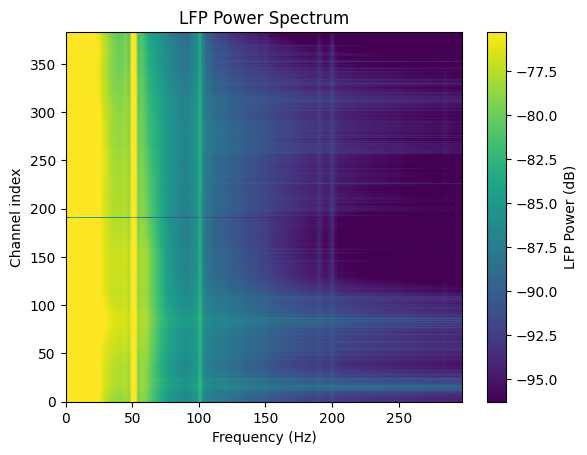

In [6]:
from brainbox.ephys_plots import image_lfp_spectrum_plot

data, fig, ax = image_lfp_spectrum_plot(lf_psd['power'], lf_psd['freqs'], display=True)

## Other relevant examples
* COMING SOON